In [43]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [45]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [46]:
with open('../data/filtered/activities_filter.pickle', 'rb') as f:
    activities = pd.DataFrame(pickle.load(f))
with open('../data/filtered/weights_filter.pickle', 'rb') as f:
    weights = pd.DataFrame(pickle.load(f))

# Data Overview

In [47]:
printmd('**Activities**')
activities.head()

**Activities**

,calories,distance,steps,updated_date,user_id
2,6.7,0.19,253,2017-02-27 08:17:06,00003941-eab1-4c08-8e57-96612cb7094d
4,24.4,0.81,1056,2017-02-27 08:17:06,00003941-eab1-4c08-8e57-96612cb7094d
5,41.8,0.97,1286,2017-02-27 08:17:06,00003941-eab1-4c08-8e57-96612cb7094d
6,55.6,1.29,1734,2017-02-27 08:17:06,00003941-eab1-4c08-8e57-96612cb7094d
7,118.6,2.32,3151,2017-02-27 08:17:06,00003941-eab1-4c08-8e57-96612cb7094d


In [48]:
printmd('**Weights**')
weights.head()

**Weights**

,bmi,body_fat,body_weight,muscle_mass,updated_date,user_id,height
0,28.968515,26.6,101.3,33.2,2017-03-26 14:59:31,0000767c-089c-415f-a3ea-10a83eff7115,187.0
1,29.025708,26.6,101.5,33.2,2017-03-26 14:59:53,0000767c-089c-415f-a3ea-10a83eff7115,187.0
2,20.247431,10.5,59.9,51.8,2017-03-02 19:29:13,0000f27e-7b4e-4cb0-875d-6d067e078291,172.0
4,20.247431,10.3,59.9,52.0,2017-03-02 19:29:13,0000f27e-7b4e-4cb0-875d-6d067e078291,172.0
5,20.247431,10.7,59.9,51.7,2017-03-02 19:29:13,0000f27e-7b4e-4cb0-875d-6d067e078291,172.0


# Data Preparation

## Weights

In [49]:
printmd('**Add fields**: year, month, day')
weights['year'] = weights['updated_date'].apply(lambda x: x.year)
weights['month'] = weights['updated_date'].apply(lambda x: x.month)
weights['day'] = weights['updated_date'].apply(lambda x: x.day)

printmd('**Filter weight columns**: user_id, year, month, bmi')
weights = weights[['user_id', 'year', 'month', 'day', 'bmi']]

printmd('**In case of multiple bmi measures in the same day, take the mean value**')
weights['bmi'] = weights.groupby(
    ['user_id', 'year', 'month', 'day'])['bmi'].transform('mean')

printmd('**Remove duplicates**')
len_before = len(weights)
weights = weights.drop_duplicates()
printmd('* Number of duplicated entries removed: {}'.format(len_before - len(weights)))
printmd('* Remaining number of weight entries: {}'.format(len(weights)))

**Add fields**: year, month, day

**Filter weight columns**: user_id, year, month, bmi

**In case of multiple bmi measures in the same day, take the mean value**

**Remove duplicates**

* Number of duplicated entries removed: 1033638

* Remaining number of weight entries: 1460410

In [50]:
printmd('**Prepared data overview: weights**')
weights.head()

**Prepared data overview: weights**

,user_id,year,month,day,bmi
0,0000767c-089c-415f-a3ea-10a83eff7115,2017,3,26,28.997112
2,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,3,2,20.247431
6,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,3,4,20.281233
7,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,3,7,20.382639
8,0000f27e-7b4e-4cb0-875d-6d067e078291,2017,3,10,20.450243


## Activities

In [51]:
printmd('**Add fields**: year, month, day')
activities['year'] = activities['updated_date'].apply(lambda x: x.year)
activities['month'] = activities['updated_date'].apply(lambda x: x.month)
activities['day'] = activities['updated_date'].apply(lambda x: x.day)

printmd('**Filter activities columns**: user_id, year, month, steps')
activities = activities[['user_id', 'year', 'month', 'day', 'steps']]

printmd('**In case of multiple steps measures per day, take the max value**')
# PS. It looks like tracker entries are progressively added during the day,
# therefore we take the max.
activities['steps'] = activities.groupby(
    ['user_id', 'year', 'month', 'day'])['steps'].transform('max')

printmd('**Remove duplicates**')
len_before = len(activities)
activities = activities.drop_duplicates()
printmd('* Number of duplicated entries removed: {}'.format(len_before - len(activities)))
printmd('* Remaining number of activity entries: {}'.format(len(activities)))

**Add fields**: year, month, day

**Filter activities columns**: user_id, year, month, steps

**In case of multiple steps measures per day, take the max value**

**Remove duplicates**

* Number of duplicated entries removed: 2360617

* Remaining number of activity entries: 623071

In [52]:
printmd('**Prepared data overview: activities**')
activities.head()

**Prepared data overview: activities**

,user_id,year,month,day,steps
2,00003941-eab1-4c08-8e57-96612cb7094d,2017,2,27,26757
103,00036f02-8b2c-4c0d-b13b-fac0725fbcb2,2015,2,1,10106
112,0003c8ae-4e96-4c85-967a-0e783e7e1066,2015,2,17,16420
115,0003c8ae-4e96-4c85-967a-0e783e7e1066,2015,3,5,10667
118,0003c8ae-4e96-4c85-967a-0e783e7e1066,2015,3,9,16128


# Merge steps and bmi data

In [53]:
printmd('**Merge bmi and steps data, keeping only keys from the activities dataframe.**')
bmi_steps = pd.merge(activities, weights, how='left', on=['user_id', 'year', 
                                                          'month', 'day'])
bmi_steps = bmi_steps.sort_values(['user_id', 'year', 'month', 'day'])
printmd('**Number of merged bmi/steps entries:** {}'.format(len(bmi_steps)))
printmd('**Overview of bmi/steps data:**')
bmi_steps.head()

**Merge bmi and steps data, keeping only keys from the activities dataframe.**

**Number of merged bmi/steps entries:** 623071

**Overview of bmi/steps data:**

,user_id,year,month,day,steps,bmi
0,00003941-eab1-4c08-8e57-96612cb7094d,2017,2,27,26757,NaN
1,00036f02-8b2c-4c0d-b13b-fac0725fbcb2,2015,2,1,10106,NaN
2,0003c8ae-4e96-4c85-967a-0e783e7e1066,2015,2,17,16420,NaN
3,0003c8ae-4e96-4c85-967a-0e783e7e1066,2015,3,5,10667,NaN
4,0003c8ae-4e96-4c85-967a-0e783e7e1066,2015,3,9,16128,NaN


In [54]:
printmd('**Interpolate bmi values**')
bmi_steps['bmi'] = bmi_steps.groupby('user_id')['bmi'].apply(lambda group: group.fillna(
    group.interpolate(method='index')))

bmi_steps['bmi'] = bmi_steps.groupby('user_id')['bmi'].apply(lambda group: group.fillna(
    method='bfill'))

bmi_steps['bmi'] = bmi_steps.groupby('user_id')['bmi'].apply(lambda group: group.fillna(
    method='ffill'))

printmd('* Remaining number of null values:')
bmi_steps.isnull().sum()

**Interpolate bmi values**

* Remaining number of null values:

user_id         0
year            0
month           0
day             0
steps           0
bmi        569900
dtype: int64

In [55]:
printmd('**Drop null values**')
bmi_steps = bmi_steps.dropna()
printmd('* Remaining number of bmi/steps entries: {}'.format(len(bmi_steps)))
printmd('* Remaining number of distinct user_ids: {}'.format(bmi_steps.user_id.nunique()))

**Drop null values**

* Remaining number of bmi/steps entries: 53171

* Remaining number of distinct user_ids: 4136

In [56]:
# Save bmi_steps data
with open('../data/filtered/bmi_steps.pickle', 'wb') as f:
    pickle.dump(bmi_steps, f)

# Histograms of remaining data

**Bmi**

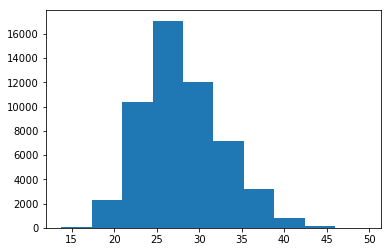

In [57]:
# Bmi Histogram
printmd('**Bmi**')
n, bins, patches = plt.hist(
    list(bmi_steps['bmi'].values), bins = 10)
plt.show()

**Steps**

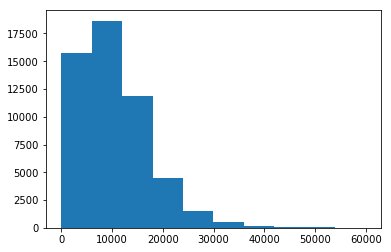

In [58]:
# Steps Histogram
printmd('**Steps**')
n, bins, patches = plt.hist(
    list(bmi_steps['steps'].values), bins = 10)
plt.show()

In [59]:
# Read users data
with open('../data/filtered/users_filter.pickle', 'rb') as f:
    users = pd.DataFrame(pickle.load(f))

**Users sex**

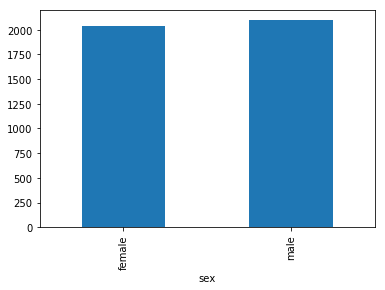

sex
female    2040
male      2096
Name: user_id, dtype: int64


In [60]:
# Users sex Histogram
printmd('**Users sex**')
# Users per sex
users = users[users.user_id.isin(bmi_steps['user_id'])]
users_sex = users.groupby('sex')['user_id'].count()
users_sex.plot(kind='bar')
plt.show()
print(users_sex)

**Users birthday**

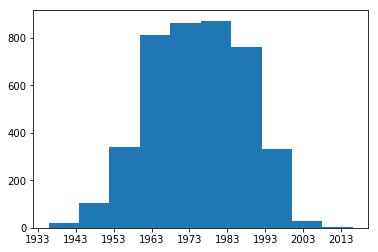

In [61]:
# Users birthday Histogram
printmd('**Users birthday**')
plt.hist(list(users['birthday'].values), bins = 10)
plt.show()